In [15]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='5y', interval='1mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-01 00:00:00+09:00,23388.630859,24091.119141,23044.779297,23656.619141,1173000000,0.0,0.0
2020-01-01 00:00:00+09:00,23319.759766,24115.949219,22892.949219,23205.179688,1133600000,0.0,0.0
2020-02-01 00:00:00+09:00,22874.269531,23995.369141,20916.400391,21142.960938,1396200000,0.0,0.0
2020-03-01 00:00:00+09:00,20849.789062,21719.779297,16358.190430,18917.009766,3101700000,0.0,0.0
2020-04-01 00:00:00+09:00,18686.119141,20365.890625,17646.500000,20193.689453,1837200000,0.0,0.0
2020-05-01 00:00:00+09:00,19991.970703,21955.439453,19448.929688,21877.890625,1539400000,0.0,0.0
2020-06-01 00:00:00+09:00,21910.890625,23185.849609,21529.830078,22288.140625,1754000000,0.0,0.0
2020-07-01 00:00:00+09:00,22338.300781,22965.560547,21710.000000,21710.000000,1454700000,0.0,0.0
2020-08-01 00:00:00+09:00,21947.580078,23431.039062,21919.830078,23139.759766,1357300000,0.0,0.0


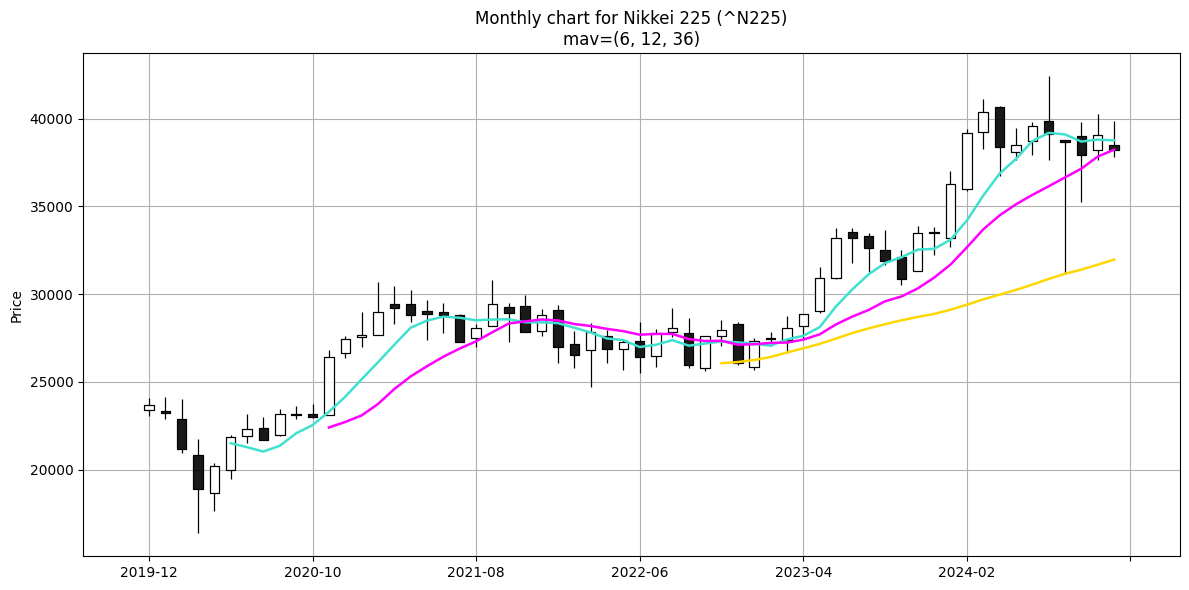

In [16]:
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

mpf.plot(
    df, type='candle', style='default',
    mav=(6, 12, 36),
    volume=False,
    datetime_format='%Y-%m',
    xrotation=0,
    ax=ax,
)
ax.set_title('Monthly chart for %s (%s)\nmav=(6, 12, 36)' %(ticker.info['longName'], symbol))
ax.grid()

plt.tight_layout()
plt.savefig('monthly_chart_n225.png')
plt.show()

In [17]:
df.tail(2)['Close']

Date
2024-10-01 00:00:00+09:00    39081.25000
2024-11-01 00:00:00+09:00    38208.03125
Name: Close, dtype: float64

In [18]:
df.tail(2)['Close'].diff()

Date
2024-10-01 00:00:00+09:00          NaN
2024-11-01 00:00:00+09:00   -873.21875
Name: Close, dtype: float64

In [19]:
df['Close'].rolling(12).mean()

Date
2019-12-01 00:00:00+09:00             NaN
2020-01-01 00:00:00+09:00             NaN
2020-02-01 00:00:00+09:00             NaN
2020-03-01 00:00:00+09:00             NaN
2020-04-01 00:00:00+09:00             NaN
2020-05-01 00:00:00+09:00             NaN
2020-06-01 00:00:00+09:00             NaN
2020-07-01 00:00:00+09:00             NaN
2020-08-01 00:00:00+09:00             NaN
2020-09-01 00:00:00+09:00             NaN
2020-10-01 00:00:00+09:00             NaN
2020-11-01 00:00:00+09:00    22393.926595
2020-12-01 00:00:00+09:00    22709.555827
2021-01-01 00:00:00+09:00    23081.073405
2021-02-01 00:00:00+09:00    23732.994141
2021-03-01 00:00:00+09:00    24588.143392
2021-04-01 00:00:00+09:00    25306.388509
2021-05-01 00:00:00+09:00    25888.237630
2021-06-01 00:00:00+09:00    26430.186686
2021-07-01 00:00:00+09:00    26894.652507
2021-08-01 00:00:00+09:00    27307.134115
2021-09-01 00:00:00+09:00    27829.429199
2021-10-01 00:00:00+09:00    28322.392415
2021-11-01 00:00:00+09:00    